In [6]:
import os
import numpy as np
from tqdm import tqdm
from PIL import Image
import pandas as pd

# Path to the data folder
data_dir = "C:/Users/Maria/OneDrive - UAB/Documentos/2º de IA/NN and Deep Learning/Project/data"
files_dir = data_dir + "ImageSets/0"
img_dir = data_dir + "JPEGImages"

data = pd.DataFrame()
txt_files = os.listdir(files_dir)
train_txt = [txt for txt in txt_files if '_train' in txt]
test_txt = [txt for txt in txt_files if '_test' in txt]
list_name = []
list_img = []
list_label = []
for txt in tqdm(train_txt):
    with open(os.path.join(files_dir, txt), 'r') as f:
        lines = f.readlines()
        for line in tqdm(lines):
            line = line.split('\t')
            if len(line) >= 2:
                if len(line[1]) >= 1:
                    label = line[1][:-1]

                    if label == "1":
                        img_name = line[0]
                        img = Image.open(os.path.join(img_dir, img_name + ".jpg")) 

                        list_img.append(np.array(img))
                        list_label.append(txt.split('_')[0])
                        list_name.append(img_name+".jpg")
    
                else:
                    print("Error in line: ", line, "from file: ", txt)
            else:
                print("Error in line: ", line, "from file: ", txt)

data["img"] = list_img
data["label"] = list_label
data["name"] = list_name

data.set_index("name", inplace=True)
data["label"] = data["label"].astype(int)
data.head()

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: 'C:/Users/Maria/OneDrive - UAB/Documentos/2º de IA/NN and Deep Learning/Project/dataImageSets/0'

In [ ]:
data_test = pd.DataFrame()
txt_files = os.listdir(files_dir)
test_txt = [txt for txt in txt_files if '_test' in txt]
list_name = []
list_img = []
list_label = []
for txt in tqdm(test_txt):
    with open(os.path.join(files_dir, txt), 'r') as f:
        lines = f.readlines()
        for line in tqdm(lines):
            line = line.split('\t')
            if len(line) >= 2:
                if len(line[1]) >= 1:
                    label = line[1][:-1]

                    if label == "1":
                        img_name = line[0]
                        img = Image.open(os.path.join(img_dir, img_name + ".jpg")) 

                        list_img.append(np.array(img))
                        list_label.append(txt.split('_')[0])
                        list_name.append(img_name+".jpg")
    
                else:
                    print("Error in line: ", line, "from file: ", txt)
            else:
                print("Error in line: ", line, "from file: ", txt)

data_test["img"] = list_img
data_test["label"] = list_label
data_test["name"] = list_name

data_test.set_index("name", inplace=True)
data_test["label"] = data["label"].astype(int)
data_test.head()

<Axes: xlabel='label'>

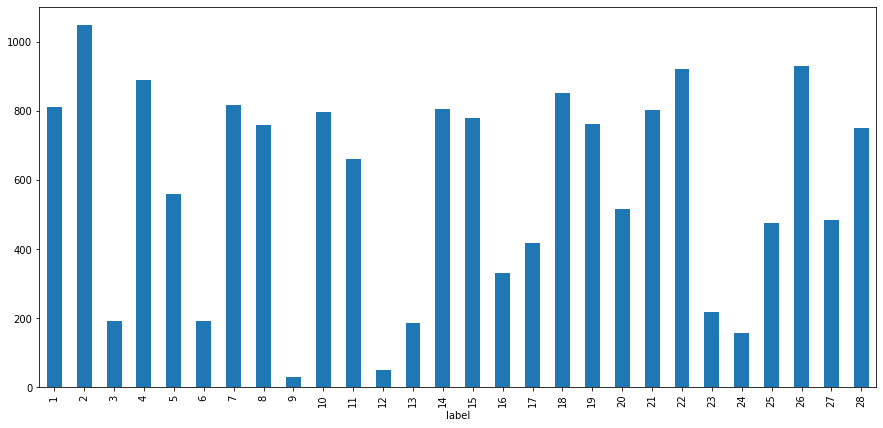

In [9]:
data["label"].value_counts().sort_index().plot(kind="bar", figsize=(15,7))

In [10]:
data["label"].value_counts().sort_index()

label
1      810
2     1049
3      192
4      889
5      560
6      192
7      816
8      758
9       29
10     797
11     661
12      50
13     186
14     806
15     778
16     330
17     416
18     850
19     761
20     514
21     801
22     922
23     218
24     156
25     474
26     928
27     484
28     751
Name: count, dtype: int64

In [11]:
# save the dataframe
# data.to_pickle("data.pkl")

In [12]:
# load the dataframe
# data = pd.read_pickle("data.pkl")

In [14]:
# open dataframe from ocr_dir
ocr_dir = "anotations.pkl"
ocr_data = pd.read_pickle(ocr_dir)

ocr_data.head()

,text_detected
n02746978_10002.jpg,"[SCHOOL QF, VISUAL&, PERFORMING, ARTS, BRIDGE,..."
n02746978_10031.jpg,"[iS it Arta, welcome, BurpItit, Buf]"
n02746978_10221.jpg,[]
n02746978_10238.jpg,[]
n02746978_10258.jpg,[]


In [21]:
# concatenate the dataframes using the index and merging the columns
data_anotated = pd.concat([data, ocr_data], axis=1, join="inner")

In [22]:
data_anotated.head()

,img,label,text_detected
n03039827_16253.jpg,"[[[130, 134, 143], [130, 134, 143], [130, 134,...",10,"[She, KLEEN-It, @ny Cleanehs]"
n03039827_10498.jpg,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",10,"[@RY CL_ANING, F4L, Curana2 4T7ee31, hout]"
n03039827_8430.jpg,"[[[161, 178, 208], [162, 179, 209], [163, 180,...",10,"[1, Sisvie]"
n03039827_3781.jpg,"[[[42, 72, 132], [41, 71, 131], [41, 71, 131],...",10,"[Tnina, IL, didy, cleincR6, DRTVE, Tn, EiG, In..."
n03039827_16136.jpg,"[[[155, 164, 181], [156, 165, 182], [157, 166,...",10,"[1, CLEANERS, SAME, DAY, SERVICE]"
